In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('datos.csv', sep='|', decimal=",")

In [4]:
df.head()

,TEMPERATURA_EXTERNA,POTENCIA_ELECTRICA
0,27.935667,NaN
1,31.321108,324.54
2,28.668434,NaN
3,24.938467,252.70
4,33.316906,331.10


In [5]:
df.describe()

,TEMPERATURA_EXTERNA,POTENCIA_ELECTRICA
count,1496.000000,1494.000000
mean,28.540185,286.214465
std,6.363332,41.516466
min,0.000000,0.000000
25%,26.204395,261.550000
50%,29.197275,288.620000
75%,32.453634,315.852500
max,38.310135,391.710000


This values must be strings

In [6]:
df.dtypes

TEMPERATURA_EXTERNA    float64
POTENCIA_ELECTRICA     float64
dtype: object

/Users/rcrespillo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/rcrespillo/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/rcrespillo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


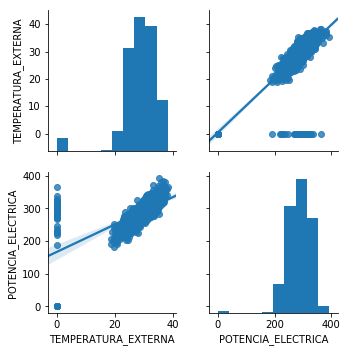

In [7]:
sns.pairplot(df, kind="reg")

In [8]:
df = df.dropna()
df = df[df.TEMPERATURA_EXTERNA != 0]

In [9]:
df.describe()

,TEMPERATURA_EXTERNA,POTENCIA_ELECTRICA
count,1449.000000,1449.000000
mean,29.426855,287.814279
std,3.963017,35.888443
min,18.765305,183.120000
25%,26.428055,262.010000
50%,29.386507,289.010000
75%,32.634224,316.070000
max,38.310135,391.710000


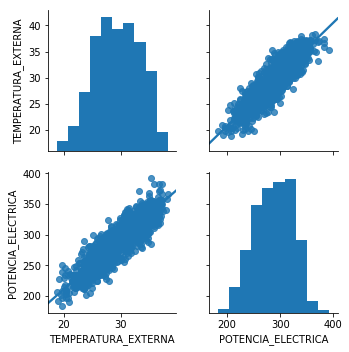

In [10]:
sns.pairplot(df, kind="reg")

In [18]:
from sklearn.model_selection import train_test_split
X = np.array(df.TEMPERATURA_EXTERNA).reshape(-1, 1)
y = df.POTENCIA_ELECTRICA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X

array([[31.321108],
       [24.938467],
       [33.316906],
       ...,
       [28.03385 ],
       [21.21879 ],
       [26.987152]])

In [20]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [21]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
y_pred = regr.predict(X_train)

In [23]:
y_pred

array([243.63061462, 294.19909967, 256.34905251, ..., 311.38433502,
       272.07035465, 286.02825241])

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [35]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Error Absoluto Medio
print("Mean absolute error: %.2f" % mean_absolute_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [8.1280854]
Independent term: 
 48.979209171514384
Mean squared error: 253.22
Mean absolute error: 12.60
Variance score: 0.81


/Users/rcrespillo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


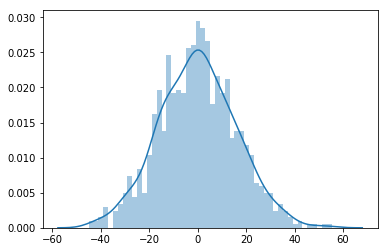

In [36]:
sns.distplot((np.asarray(y_train) - np.asarray(y_pred)), bins = 50)
plt.show()